<a href="https://colab.research.google.com/github/felixgper/Meats/blob/master/Meats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO: CONSUMO DE CARNE EN DISTINTAS LOCACIONES

---

# IMPORTACION DE LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files
import io

In [2]:
uploaded = files.upload()

Saving MEAT.csv to MEAT.csv


In [3]:
print(uploaded.keys())


dict_keys(['MEAT.csv'])


In [4]:
df = pd.read_csv(next(iter(uploaded)), delimiter=',')

In [5]:
df['Value'] = df['Value'].round(2)
df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.72
1,AUS,BEEF,KG_CAP,1992,26.20
2,AUS,BEEF,KG_CAP,1993,26.17
3,AUS,BEEF,KG_CAP,1994,25.46
4,AUS,BEEF,KG_CAP,1995,25.34


In [6]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = [
    '#4C72B0',  # Azul
    '#55A868',  # Verde
    '#C44E52',  # Rojo
    '#8172B2',  # Morado
    '#CCB974',  # Amarillo
    '#64B5CD',  # Azul claro
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# ANALISIS EXPLORATORIO DE DATOS

Las Variables de nuestro conjunto son:

- LOCATION : País de referencia
- SUBJECT : Categoría de carne
- MEASURE : Medida utilizada para el calculo de los datos (kilogramo por persona o consumo total en el país)
- TIME : Tiempo que corresponde el consumo de carne.
- VALUE: Valor consumido de carne

In [7]:
# Verificando si tiene valores nulos
df_null = df.isnull().sum()
print('Los valores nulos de mi conunto de datos: \n', df_null)

# Verificando valores duplicados
df_duplicated = df.duplicated().sum()
print('Los valores duplicados en mi conjunto de datos: \n', df_duplicated)

# Tamaño del conjunto de datos
df_shape = df.shape
print('El tamaño de mi conjutno de datos es: \n', df_shape)

# Variables de nuestro conjunto de datos
df_var = df.columns
print('Variables del conjunto de datos: \n', df_var)

# Aplicar describe() a las columnas numéricas
description = df.describe(include=[np.number])

# Redondear los valores en el DataFrame resultante a dos decimales
rounded_description = description.round(decimals=2)

print("\nEstadísticas descriptivas: \n", rounded_description)

print('-----------------------------------------------------------------------')
# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Los valores nulos de mi conunto de datos: 
 LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64
Los valores duplicados en mi conjunto de datos: 
 0
El tamaño de mi conjutno de datos es: 
 (13760, 5)
Variables del conjunto de datos: 
 Index(['LOCATION', 'SUBJECT', 'MEASURE', 'TIME', 'Value'], dtype='object')

Estadísticas descriptivas: 
            TIME      Value
count  13760.00   13760.00
mean    2008.18    1861.70
std       10.60    9385.66
min     1990.00       0.00
25%     1999.00       3.48
50%     2008.00      23.14
75%     2017.00     296.78
max     2026.00  131607.31
-----------------------------------------------------------------------

Frecuencia de valores únicos de LOCATION
LOCATION
MYS      296
THA      296
IDN      296
IRN      296
ISR      296
VNM      296
CAN      296
MOZ      296
NGA      296
PAK      296
PRY      296
PER      296
PHL      296
URY      296
SAU      296
ZAF      296
SDN      296
IND      296
HTI      296
GHA      296
DZA 

# ANALISIS DE DISTRIBUCION

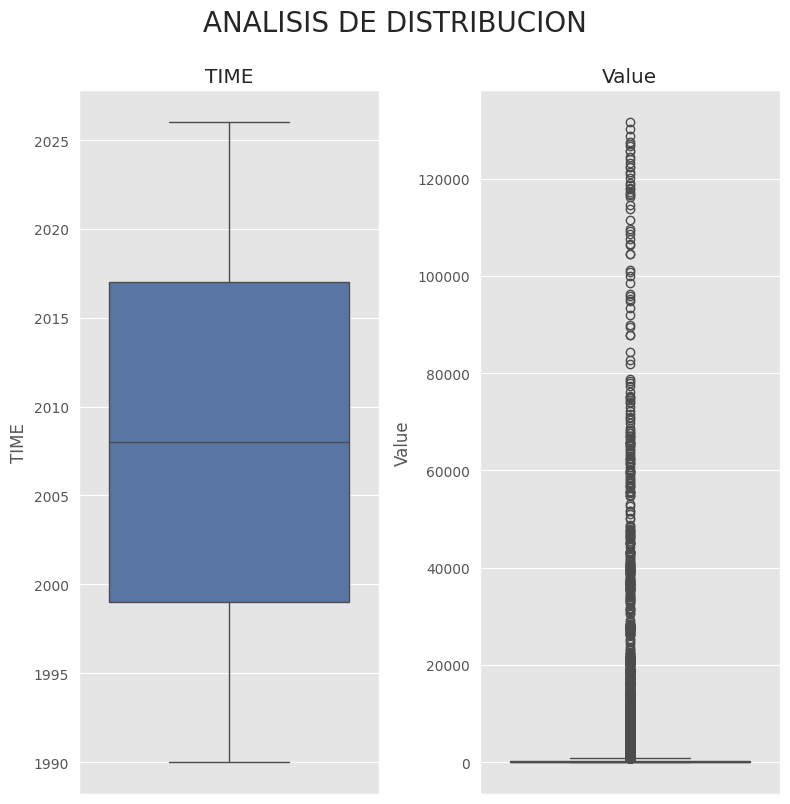

In [8]:
int_cols = df.select_dtypes(exclude='object').columns
nplots = len(int_cols)
nrows = 1
cols = nplots // nrows + (nplots % nrows > 0)

fig, axs = plt.subplots(nrows= nrows, ncols = cols, figsize = (8,8))
fig.suptitle('ANALISIS DE DISTRIBUCION', fontsize = 20, y = 1.0)

for i,col in enumerate(int_cols):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.boxplot(data= df, y=col, ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# HALLAMOS LA CORRELACION

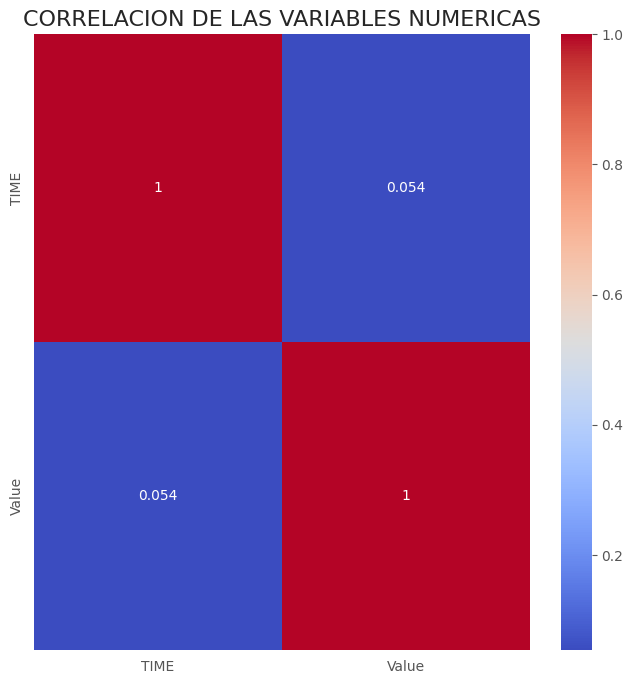

In [9]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(data = df[int_cols].corr(), annot= True, annot_kws={'size' : 10}, cmap= 'coolwarm')
plt.title('CORRELACION DE LAS VARIABLES NUMERICAS', fontsize = 16, y =1.0)
plt.show()

# DISTRIBUCION DE VARIABLES CATEGÓRICAS

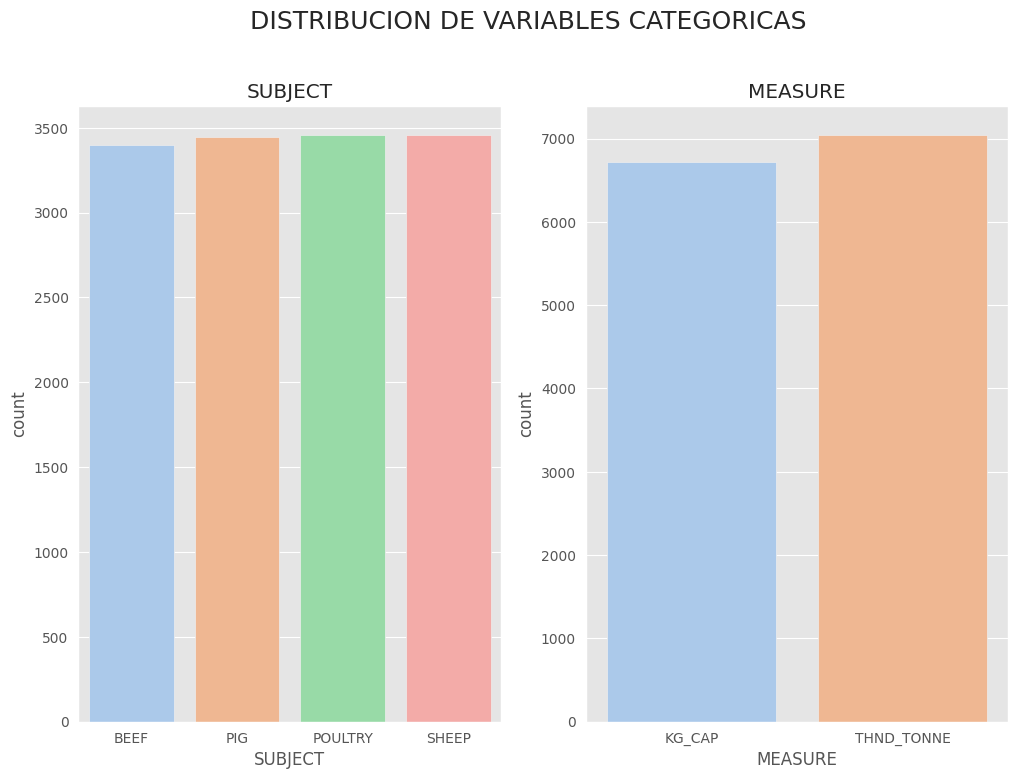

In [10]:
cat_cols = df[['SUBJECT', 'MEASURE']].columns

nplots = len(cat_cols)
nrows = 1

cols = nplots // nrows + (nplots % nrows >0)

fig, axs = plt.subplots(nrows= nrows, ncols= cols, figsize = (12,8))
fig.suptitle('DISTRIBUCION DE VARIABLES CATEGORICAS', fontsize = 18, y = 1.0)

for i,col in enumerate(cat_cols):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.countplot(data= df, x = col, ax= ax, hue = col, legend = False, palette = 'pastel')
    ax.set_title(col)
plt.show()

# COMO TENEMOS 2 TIPOS DE UNIDAD DE MEDIDA, LO IDONEO ES ANALIZARLO POR SEPARADO

---

### KILOGRAMO POR PERSONA

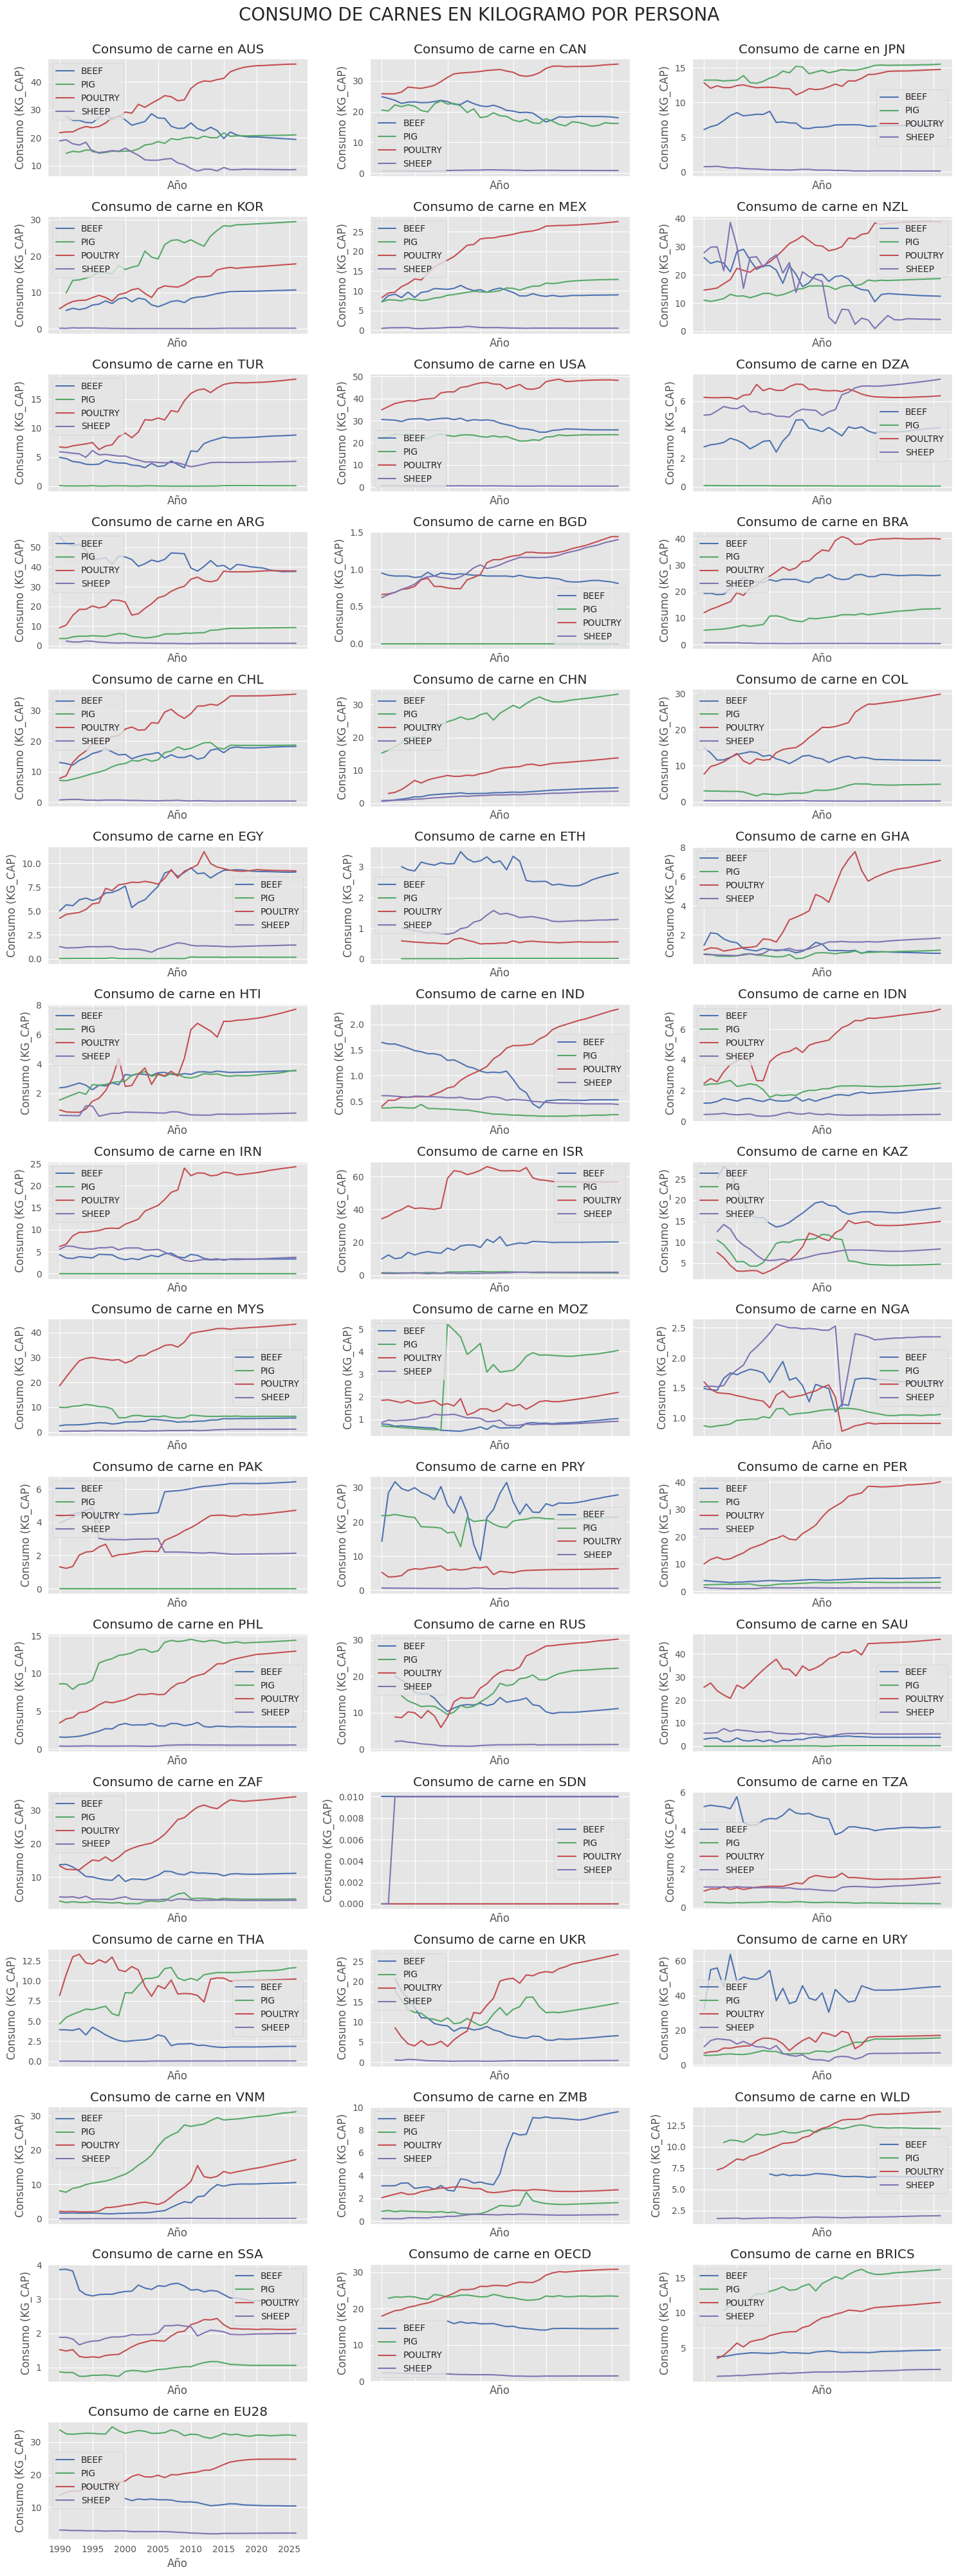

In [11]:
# Filtrar los datos para incluir solo el consumo en KG_CAP
df_kg_cap = df[df['MEASURE'] == 'KG_CAP']

# Obtener las ubicaciones únicas
locations = df_kg_cap['LOCATION'].unique()

# Definir el número de filas y columnas
nrows = 16
ncols = 3

# Crear una figura con subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 40), sharex=True)
fig.suptitle('CONSUMO DE CARNES EN KILOGRAMO POR PERSONA', fontsize = 20.0, y = 1.0)

# Aplanar el array de ejes para iterar fácilmente
axs = axs.flatten()

# Crear un gráfico por cada ubicación
for i, location in enumerate(locations):
    if i >= len(axs):
        break  # Romper el bucle si hay más ubicaciones que subplots disponibles
    ax = axs[i]
    location_df = df_kg_cap[df_kg_cap['LOCATION'] == location]

    for meat in location_df['SUBJECT'].unique():
        meat_df = location_df[location_df['SUBJECT'] == meat]
        ax.plot(meat_df['TIME'], meat_df['Value'], label=meat)

    ax.set_title(f'Consumo de carne en {location}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Consumo (KG_CAP)')
    ax.legend()

# Eliminar los subplots vacíos si hay menos ubicaciones que subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

### TONELADA CONSUMIDA POR LOCACION

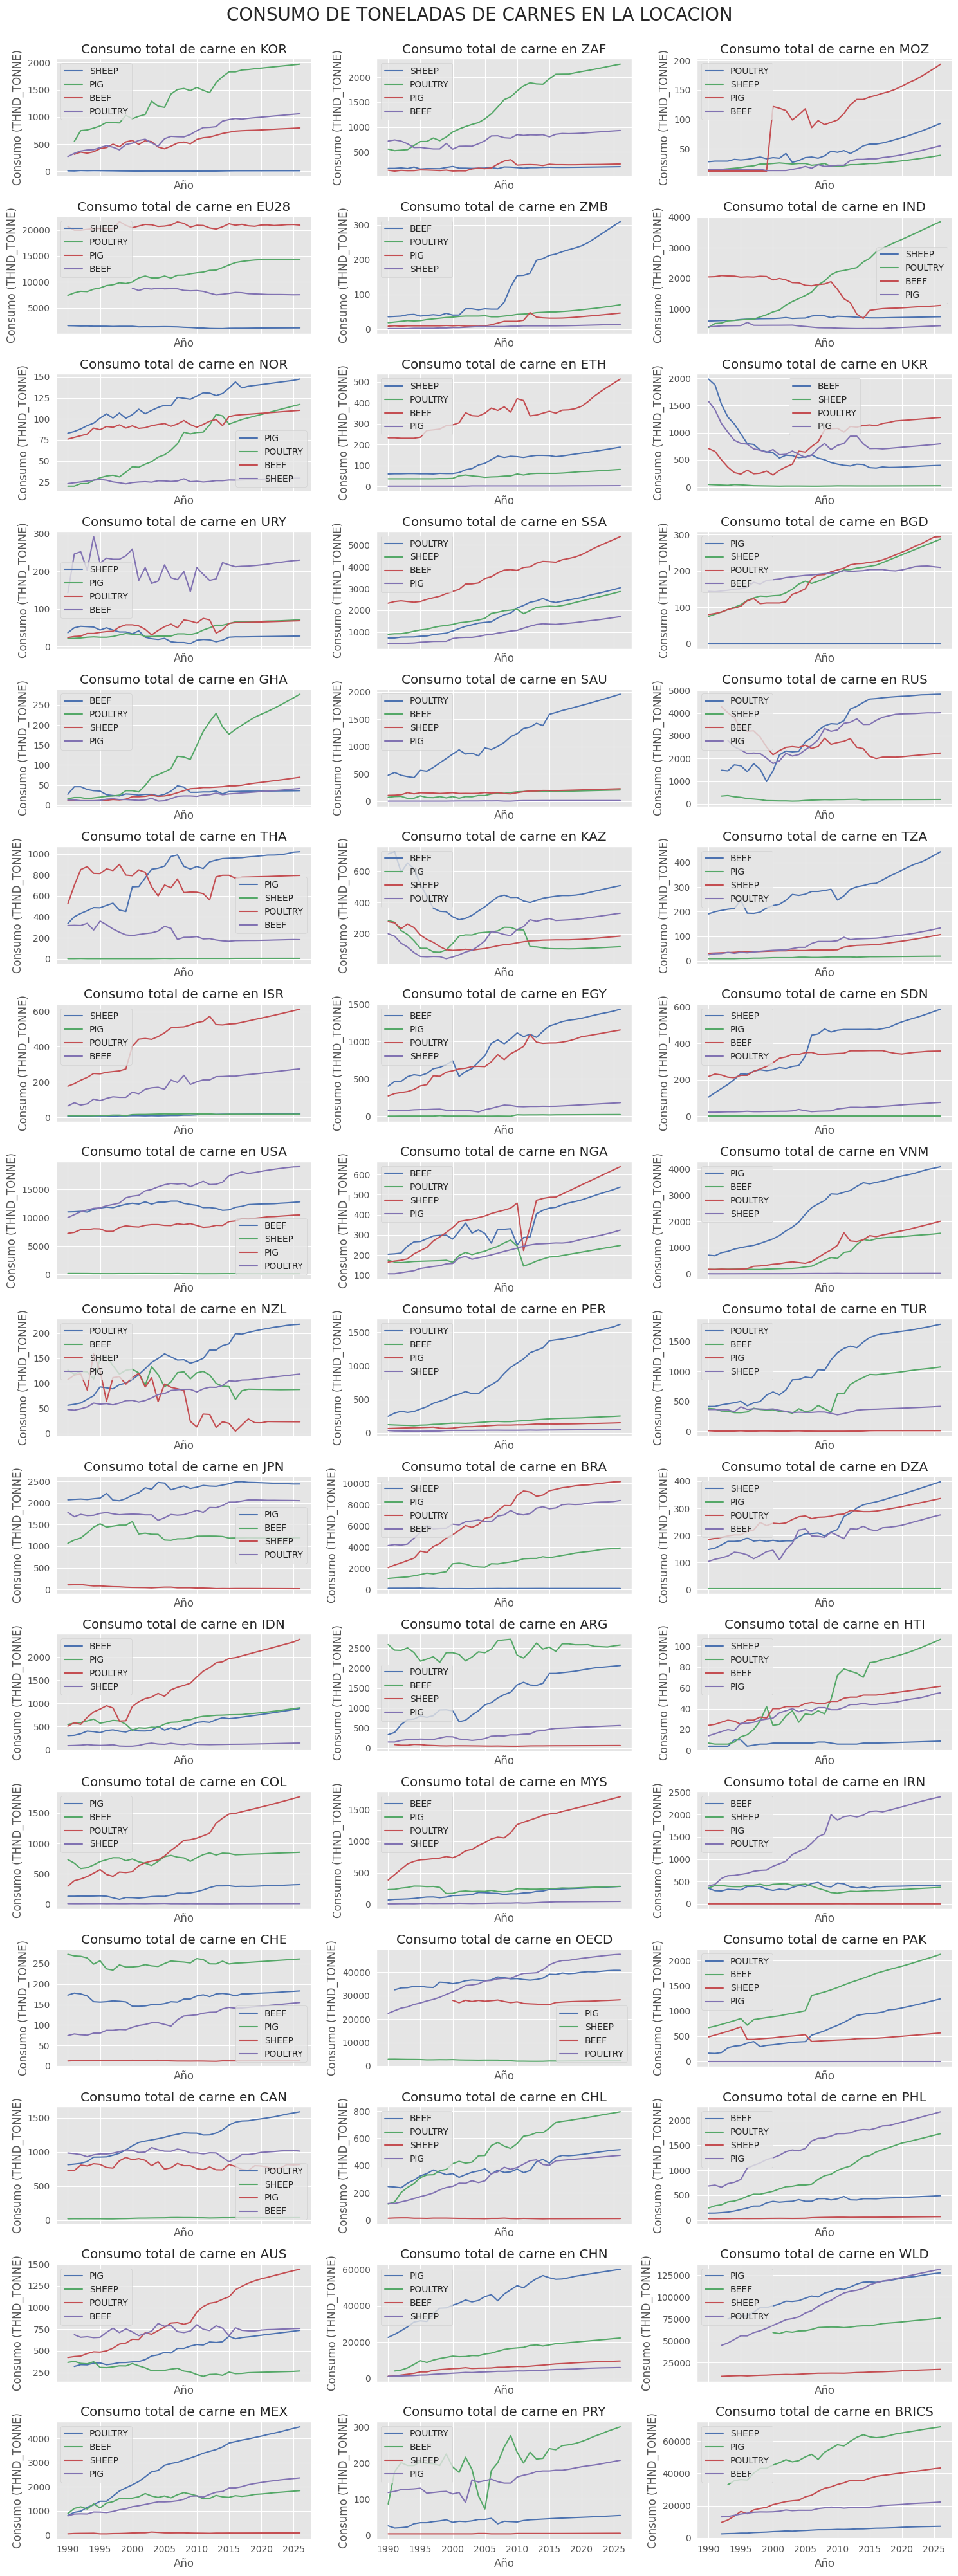

In [12]:
# Filtrar los datos para incluir solo el consumo en KG_CAP
df_kg_cap = df[df['MEASURE'] == 'THND_TONNE']

# Obtener las ubicaciones únicas
locations = df_kg_cap['LOCATION'].unique()

# Definir el número de filas y columnas
nrows = 16
ncols = 3

# Crear una figura con subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 40), sharex=True)
fig.suptitle('CONSUMO DE TONELADAS DE CARNES EN LA LOCACION', fontsize = 20.0, y = 1.0)

# Aplanar el array de ejes para iterar fácilmente
axs = axs.flatten()

# Crear un gráfico por cada ubicación
for i, location in enumerate(locations):
    if i >= len(axs):
        break  # Romper el bucle si hay más ubicaciones que subplots disponibles
    ax = axs[i]
    location_df = df_kg_cap[df_kg_cap['LOCATION'] == location]

    for meat in location_df['SUBJECT'].unique():
        meat_df = location_df[location_df['SUBJECT'] == meat]
        ax.plot(meat_df['TIME'], meat_df['Value'], label=meat)

    ax.set_title(f'Consumo total de carne en {location}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Consumo (THND_TONNE)')
    ax.legend()

# Eliminar los subplots vacíos si hay menos ubicaciones que subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# ANALISIS ESPECIFICO PARA RESPONDER NUESTRAS PREGUNTAS

Luego de revisar nuestras gráficas, nos hemos percatado que podemos decidir entre dos cosas, el hecho de hacer nuestro analisis por separada segun el measure, quiere decir, por un lado el kilogramo por persona y el consumos general por locación. O también se puede convertir este consumo de toneladas en kilogramo por persona y hacerlo solo uno. Se ha optado usar la primera forma ya mencionada.

Lo que se pudo evidenciar también, es que el consumo de tonelada de carne en una locación tiene 2 locaciones más y esto no es un poco bueno si queremos hacer una comparacion sobre el consumo de carne mas consumido y el total de esta segun las locaciones.

### DIVIDIMOS NUESTRO DATA FRAME EN 2, SEGUN EL MEASURE:
- KG_CAP
- THIND_TONNE

In [13]:
df_kg = df[df['MEASURE'] == 'KG_CAP']
df_tonne = df[df['MEASURE'] == 'THND_TONNE']

# KILOGRAMO POR PERSONA (KG_CAP)

## Pregunta: ¿Locación que tuvo mas consumo de carne?

In [14]:
df_location = df_kg.groupby('LOCATION')['Value'].mean().sort_values(ascending= False).reset_index()
df_location['Value'] = df_location['Value'].round(2)
df_location = df_location.head()

<Figure size 800x800 with 0 Axes>

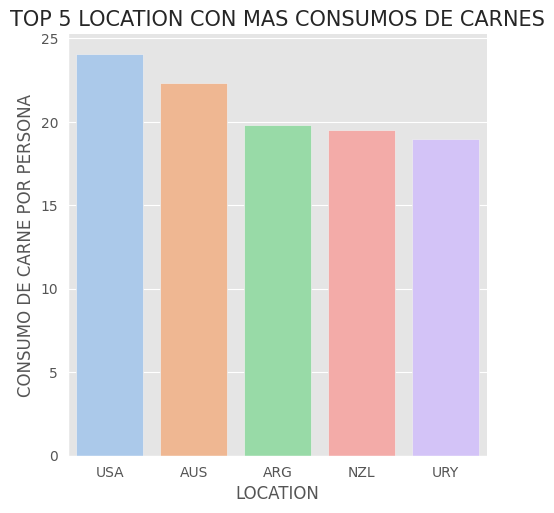

In [15]:
plt.figure(figsize= (8,8))
sns.catplot(data = df_location, x = 'LOCATION', y = 'Value', hue = 'LOCATION', palette= 'pastel', kind='bar')
plt.title('TOP 5 LOCATION CON MAS CONSUMOS DE CARNES', fontsize = 15, y = 1.0)
plt.xlabel('LOCATION')
plt.ylabel('CONSUMO DE CARNE POR PERSONA')
plt.show()

## Pregunta: ¿Cúal fue la categoría más vendida?

In [16]:
df_categoria = df_kg.groupby('SUBJECT')['Value'].mean().sort_values(ascending= False).reset_index()
df_categoria['Value'] = df_categoria['Value'].round(2)
df_categoria

,SUBJECT,Value
0,POULTRY,15.63
1,BEEF,10.09
2,PIG,8.76
3,SHEEP,2.23


<Figure size 800x800 with 0 Axes>

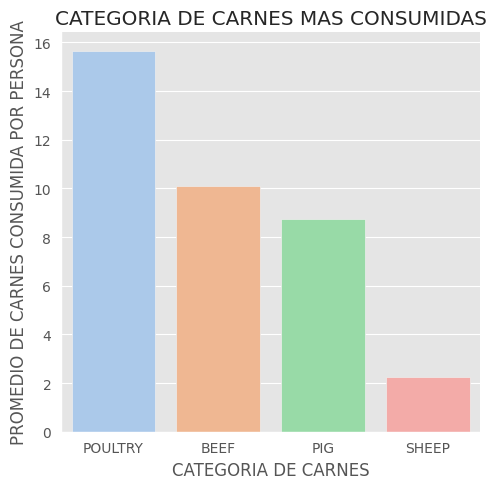

In [17]:
plt.figure(figsize=(8,8))
sns.catplot(data = df_categoria, x = 'SUBJECT', y = 'Value', hue = 'SUBJECT', palette= 'pastel', kind = 'bar')
plt.title('CATEGORIA DE CARNES MAS CONSUMIDAS')
plt.xlabel('CATEGORIA DE CARNES')
plt.ylabel('PROMEDIO DE CARNES CONSUMIDA POR PERSONA')
plt.tight_layout()
plt.show()

## Pregunta: ¿El incremento de la carne se da con el paso del tiempo?

In [18]:
df_tempo = df_kg.groupby('TIME')['Value'].mean().sort_values(ascending= False).reset_index()
df_tempo['Value'] = df_tempo['Value'].round(2)
df_tempo = df_tempo.head()
df_tempo

,TIME,Value
0,2026,10.59
1,2025,10.55
2,2024,10.50
3,2023,10.45
4,2022,10.40


<Figure size 1200x800 with 0 Axes>

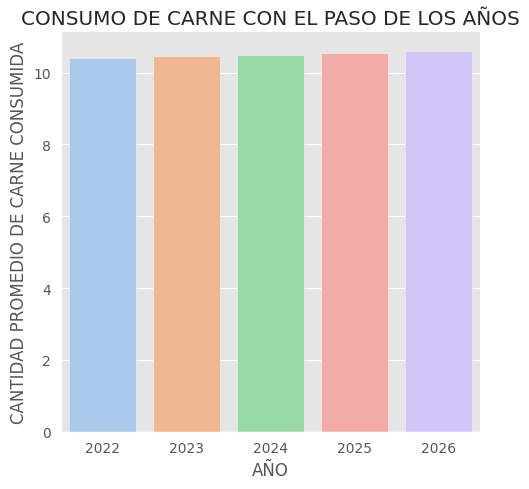

In [19]:
plt.figure(figsize= (12,8))
sns.catplot(data = df_tempo, x = 'TIME', y = 'Value', palette= 'pastel', hue = 'TIME', legend= False, kind= 'bar')
plt.title('CONSUMO DE CARNE CON EL PASO DE LOS AÑOS')
plt.xlabel('AÑO')
plt.ylabel('CANTIDAD PROMEDIO DE CARNE CONSUMIDA')
plt.tight_layout()
plt.show()

De los gráficos como tabla que hemos realizado para responder nuestras preguntas, el último gráfico que es consumo de la carne segun el paso de los años, se nos viene otra pregunta:

¿Consumo segun la categoría de la carne segun el paso de los años?

Esto lo hacemos con el fin de un mejor analisis, porque puede ser que se haya incrementado el nivel de carne por año, pero también un buen indicador es saber en cual.

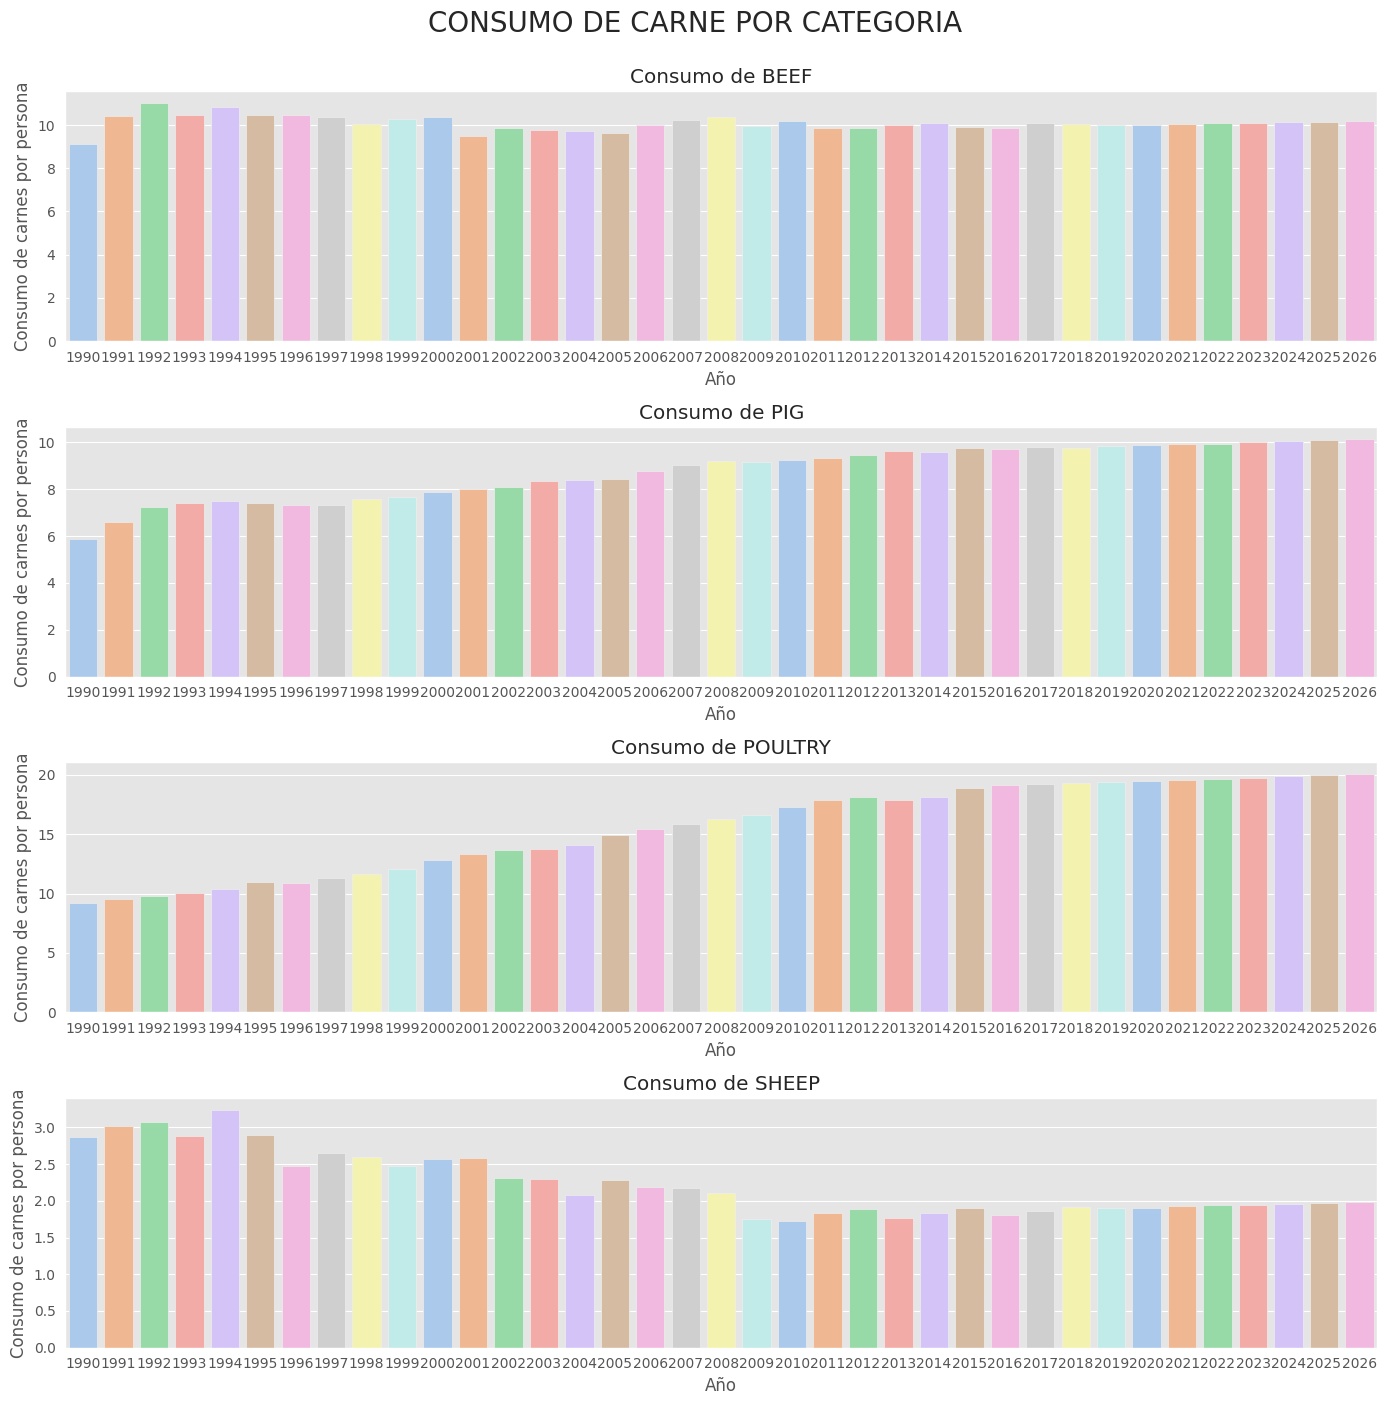

In [20]:
df_grouped = df_kg.groupby(['SUBJECT', 'TIME'])['Value'].mean().reset_index()

meats = df_grouped['SUBJECT'].unique()

nplots = len(meats)
nrows = 4
cols = nplots // nrows + (nplots % nrows > 0)

fig, axs = plt.subplots(nrows= nrows, ncols= cols, figsize = (14,14))
fig.suptitle('CONSUMO DE CARNE POR CATEGORIA', fontsize = 20, y = 1.0)

axs = axs.flatten()

for i, col in enumerate(meats):
    ax = axs[i] if nrows > 1 else axs[i % cols]
    df_meat = df_grouped[df_grouped['SUBJECT'] == col]
    sns.barplot(data = df_meat, x = 'TIME', y = 'Value', ax=ax, palette= 'pastel', hue = 'TIME', legend= False)
    ax.set_title(f'Consumo de {col}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Consumo de carnes por persona')

plt.tight_layout()
plt.show()


# TONELADA DE CARNES (THIND_TONNE)

## ¿Qué locación tuvo mas consumo de carne?

In [21]:
df_loc = df_tonne.groupby('LOCATION')['Value'].sum().sort_values(ascending= False).reset_index()
df_loc['Value'] = df_loc['Value'].round(2)
df_loc = df_loc.head()
df_loc

,LOCATION,Value
0,WLD,9104042.85
1,BRICS,3686939.90
2,OECD,3533733.80
3,CHN,2602541.84
4,EU28,1461474.06


<Figure size 800x800 with 0 Axes>

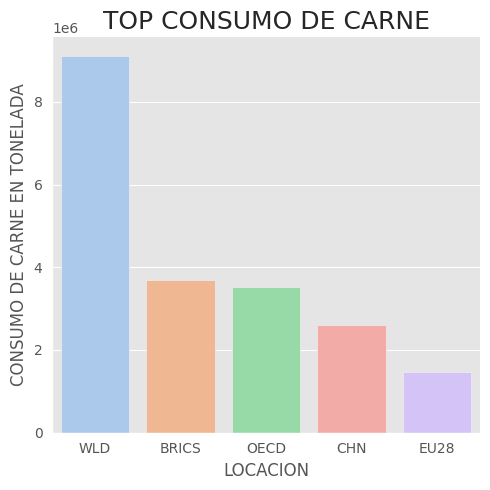

In [22]:
plt.figure(figsize=(8,8))
sns.catplot(kind= 'bar', data = df_loc, x = 'LOCATION', y = 'Value', hue = 'LOCATION', legend= False, palette= 'pastel')
plt.title('TOP CONSUMO DE CARNE', fontsize = 18, y = 1.0)
plt.ylabel('CONSUMO DE CARNE EN TONELADA')
plt.xlabel('LOCACION')
plt.tight_layout()
plt.show()

## Pregunta : ¿Categoría de carne mas consumida?

In [23]:
df_carne = df_tonne.groupby('SUBJECT')['Value'].sum().sort_values(ascending= False).reset_index()
df_carne

,SUBJECT,Value
0,PIG,10375378.24
1,POULTRY,8683010.74
2,BEEF,5321748.68
3,SHEEP,1175239.48


<Figure size 800x800 with 0 Axes>

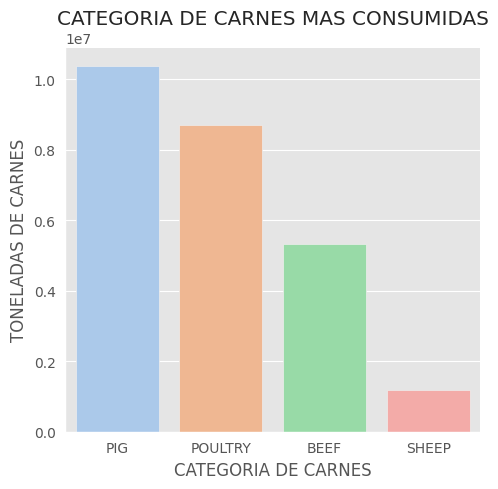

In [24]:
plt.figure(figsize=(8,8))
sns.catplot(kind= 'bar', data = df_carne, x= 'SUBJECT', y = 'Value', hue = 'SUBJECT', legend= False, palette= 'pastel')
plt.title('CATEGORIA DE CARNES MAS CONSUMIDAS')
plt.ylabel('TONELADAS DE CARNES')
plt.xlabel('CATEGORIA DE CARNES')
plt.tight_layout()
plt.show()

## Pregunta: ¿El incremento de la carne se da con el paso del tiempo?

In [25]:
df_time = df_tonne.groupby('TIME')['Value'].sum().sort_values(ascending= False).reset_index()
df_time = df_time.head()
df_time

,TIME,Value
0,2026,942198.98
1,2025,934075.71
2,2024,925315.72
3,2023,916374.82
4,2022,906642.27


<Figure size 1200x800 with 0 Axes>

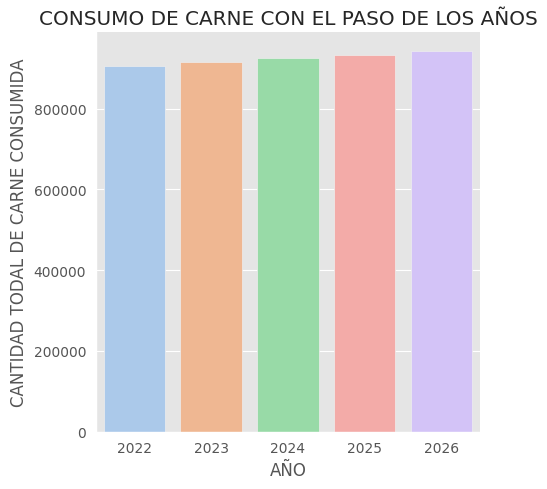

In [26]:
plt.figure(figsize= (12,8))
sns.catplot(data = df_time, x = 'TIME', y = 'Value', palette= 'pastel', hue = 'TIME', legend= False, kind= 'bar')
plt.title('CONSUMO DE CARNE CON EL PASO DE LOS AÑOS')
plt.xlabel('AÑO')
plt.ylabel('CANTIDAD TODAL DE CARNE CONSUMIDA')
plt.tight_layout()
plt.show()

A diferencia del gráfico realiazado mas arriba. La tabla que deseamos sacar no sera por promedio, sino por suma, porque es lo que estamos buscando, el consumo de carne total en los distintos años.

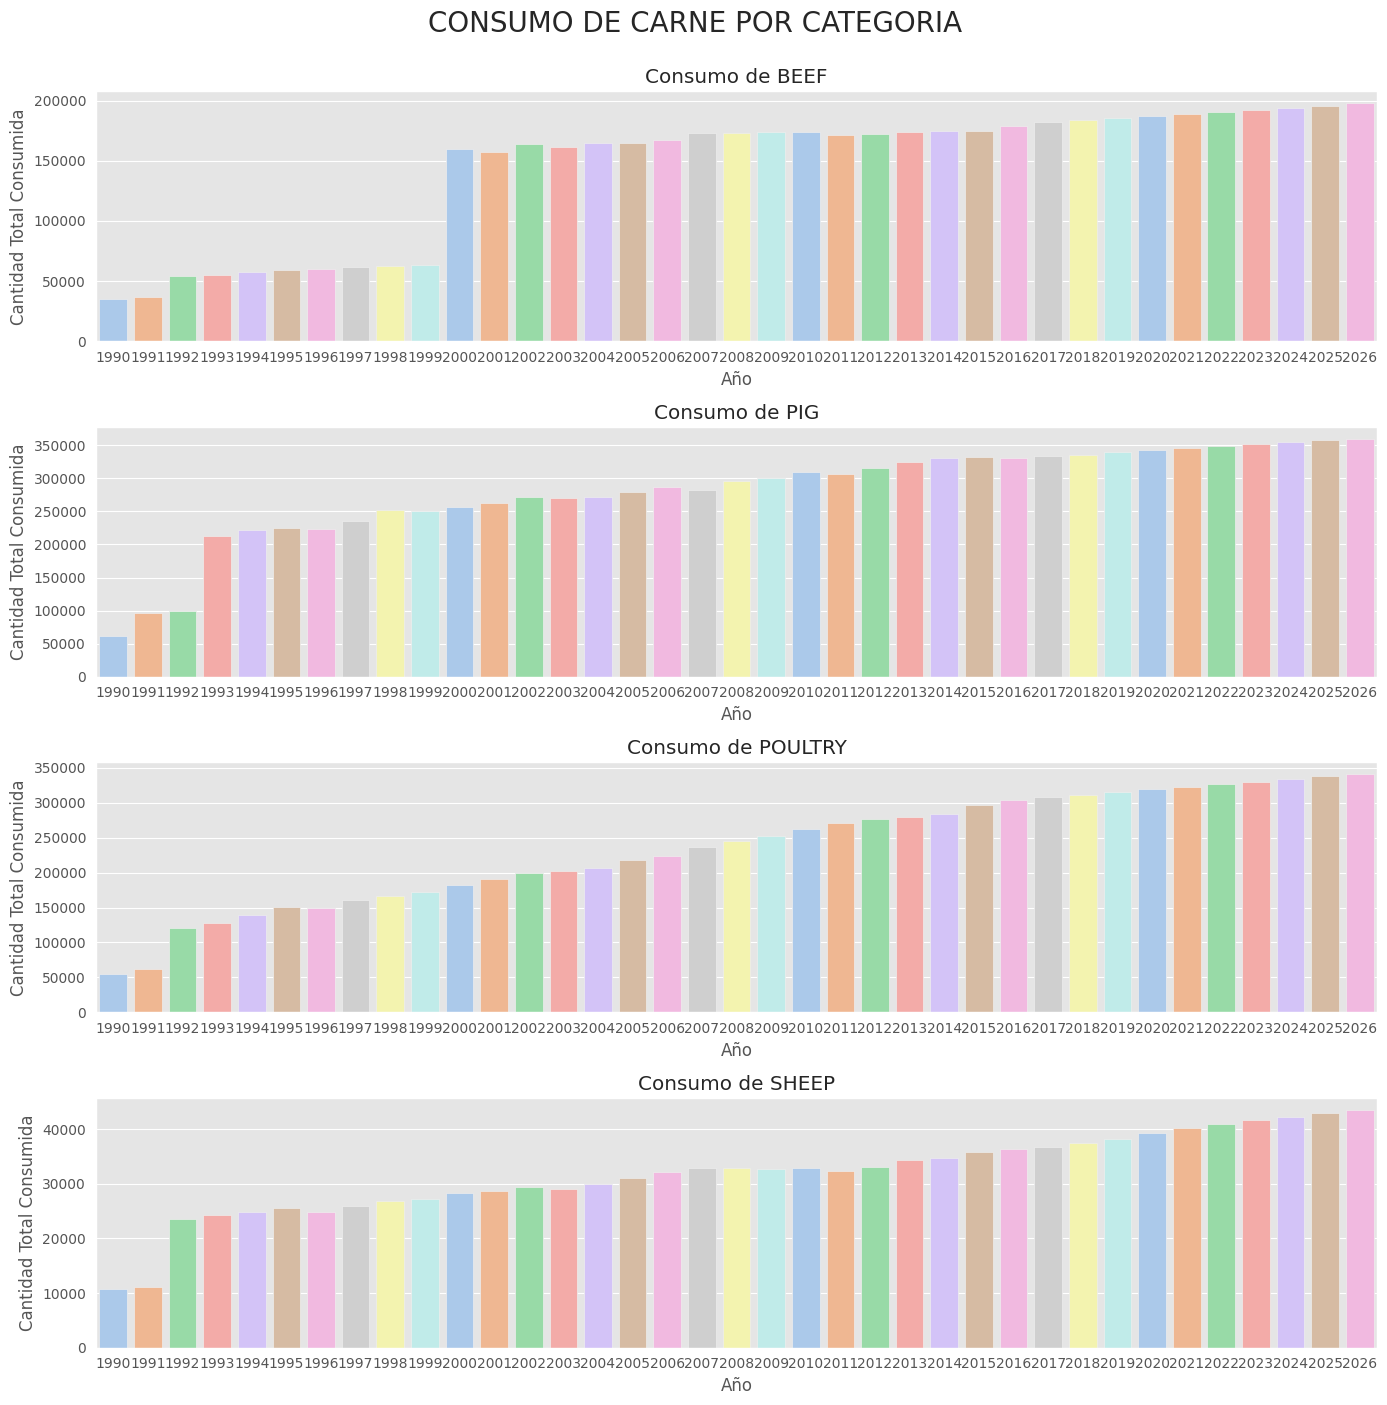

In [27]:
df_grouped = df_tonne.groupby(['SUBJECT', 'TIME'])['Value'].sum().reset_index()

meats = df_grouped['SUBJECT'].unique()

nplots = len(meats)
nrows = 4
cols = nplots // nrows + (nplots % nrows > 0)

fig, axs = plt.subplots(nrows= nrows, ncols= cols, figsize = (14,14))
fig.suptitle('CONSUMO DE CARNE POR CATEGORIA', fontsize = 20, y = 1.0)

axs = axs.flatten()

for i, col in enumerate(meats):
    ax = axs[i] if nrows > 1 else axs[i % cols]
    df_meat = df_grouped[df_grouped['SUBJECT'] == col]
    sns.barplot(data = df_meat, x = 'TIME', y = 'Value', ax=ax, palette= 'pastel', hue = 'TIME', legend= False)
    ax.set_title(f'Consumo de {col}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Cantidad Total Consumida')

plt.tight_layout()
plt.show()


De todo lo graficado y mencionado, podemos responder nuestras preguntas:

- Pregunta: ¿Qué locación tuvo mas consumo de carne?

Según lo ya trabajado, podemos decir que 'USA' es de las locaciones que una persona promedio consumió mas carne, esto fue del 24.05 KG.
Pero si nos basamos en el total de carne consumida, el que mayor valor representó en el consumo total fue el de 'WLD' con 9104042.85 en total de consumo de carne. Esto es porque en WLD, BRICS, OECD estan formadas por varias locaciones.

Lo idóneo sería realizarlo sin estos para ver si el kilogramos por persona mas consumido es directamente proporcional al consumo total de carne de una persona en dicha locación.

- Pregunta: ¿Cúal fue la categoría más vendida?

La categoría mas vendida segun el consumo de una persona promedio es el 'POULTRY', representando un 15.63 KG de consumo promedio.
Por otra parte tenemos al consumo de carne total, siendo la catogría 'PIG' la de mayor consumo de carne que tuvo, teniendo 	10375378.24. Aquí claramento podemos ver que el hecho que una persona promedio haya consumido un  tipo de categoría, no es directamente proporcional al consumo total de estas carnes.

- Pregunta: ¿El incremento de la carne se da con el paso del tiempo?

Si, el promedio de consumo de carne por persona aumenta segun va incrementando los años. Se realizó el mismo análisis pero para la cantidad total de carne, dando la misma tendencia de consumo (el increment del consumo con el paso del tiempo).



# PORCENTAJE DE CRECIMIENTO DEL CONSUMO DE CARNE AÑO TRAS AÑO

## PARA KG_CAP

In [28]:
# Ordenamos el DataFrame por el tiempo en orden ascendente
df_tempo = df_tempo.sort_values(by="TIME")

# Calculamos la tasa de crecimiento anual
df_tempo['Growth_Rate'] = df_tempo['Value'].pct_change()

# Calculamos el promedio de la tasa de crecimiento anual
average_growth_rate = df_tempo['Growth_Rate'].mean()

# Convertimos a porcentaje
print('Porcentaje del consumo LxL: ', (average_growth_rate * 100).round(2))

Porcentaje del consumo LxL:  0.45


## PARA THIND_TONNE

In [29]:
# Ordenamos el DataFrame por el tiempo en orden ascendente
df_time = df_time.sort_values(by="TIME")

# Calculamos la tasa de crecimiento anual
df_time['Growth_Rate'] = df_time['Value'].pct_change()

# Calculamos el promedio de la tasa de crecimiento anual
average_growth_rate = df_time['Growth_Rate'].mean()

# Convertimos a porcentaje
print('Porcentaje del consumo LxL: ', (average_growth_rate * 100).round(2))

Porcentaje del consumo LxL:  0.97


# INFORME SOBRE EL ANALISIS DEL CONSUMO DE CARNE EN LAS DISTINTAS CATEGORIAS

Despues de hacer nuestro analisis en nuestro conjunto de datos que consta de 13760 observaciones y 5 variables, podemos corroborar información que en el momento de hacernos las preguntas se habian planteado.

Pero ha medida que ibamos respondiendo, iban apareciendo mas incognitas a responder, esto especificamente lo hablamos sobre las categorias de carne.
Puesto que, a medida que el tiempo va pasando, el consumo de carne va en aumento. Con la data que ya teniamos podemos sacar la varianza en el consumo de carne, esto lo hacemos para 2 variables como todo analisis que se ha realizado en este proyecto.

Para el consumo de una persona promedio tenemos un aumento del 0.45 % año, mientras que el consumo total segun locacion va en aumento tambien pero con el 0.97 %. Esto quiere decir que el aumento y consumo de carne esta en subida. Lo cual es bueno según la logística que se desee.

Así mismo realizamos un analisis sobre el consumo de estas carnes pero por categoría, para poder ver mejor cual de estas tuvo mayor consumo con el paso de los años. Siendo el 'POULTRY' como la categoria de carne mas consumida por persona, con un 15.63 KG, pero a su vez tuvimos que realizar el analisis para el consumo total, dando como resultado que la categoría mas consumida fue 'PIG', con un consumo de 10375378.24 tonelada de carne.

Con el analisis por categoría separada podemos ver que el consumo que tenia 'SHEEP' era mayor en años anteriores, y que a como iba bajando el consumo de esto, iba incrementando en las demas categorías. Esto puede suponer que es porque estaban reemplazando el consumo de carne por otra categoría, ya sea por el precio, sabor o simplemente decision personal.

# ENTRENAMIENTO Y TESTEO

---

Como hemos venido analizando, realizaremos tanto para kilogramo por persona como tonelada consumida.

# KG_CAP

### División de datos

In [31]:
X = df_kg[['TIME']].values
y = df_kg['Value'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento y evaluación de modelos

Para este proyecto, hemos elegido dos modelos para poder evaluar la cantidad de consumo en los proximos años:

- Regresión Lineal
- XGBoost

#### REGRESION LINEAL

In [32]:
# Crear y entrenar el modelo de Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Calcular el error cuadrático medio (MSE) en entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Mostrar los resultados
print('El error cuadrático medio en entrenamiento es:', mse_train.round(2))
print('El error cuadrático medio en prueba es:', mse_test.round(2))

El error cuadrático medio en entrenamiento es: 121.57
El error cuadrático medio en prueba es: 129.0


#### XGBOOST

In [34]:
# Preparar los datos para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Configurar los parámetros de XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

# Entrenar el modelo de XGBoost
xgb_reg = xgb.train(params, dtrain, num_boost_round=100)

# Hacer predicciones
y_pred_train_xgb = xgb_reg.predict(dtrain)
y_pred_test_xgb = xgb_reg.predict(dtest)

# Calcular el error cuadrático medio (MSE) en entrenamiento y prueba
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

# Mostrar los resultados
print('El error cuadrático medio en entrenamiento es:', mse_train_xgb.round(2))
print('El error cuadrático medio en prueba es:', mse_test_xgb.round(2))

El error cuadrático medio en entrenamiento es: 121.42
El error cuadrático medio en prueba es: 129.83


### VALIDACION CRUZADA

In [36]:
models = [
    ('Regresion Lineal', LinearRegression()),
    ('XGBoost', xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100))
]

# Configurar la validación cruzada
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Métricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean MSE: {cv_results.mean():.2f}, Std MSE: {cv_results.std():.2f}')

Metricas 
----------------------

Regresion Lineal: Mean MSE: -123.08, Std MSE: 5.39
XGBoost: Mean MSE: -124.32, Std MSE: 5.50


### HIPERPARMATROS

In [37]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y sus respectivos hiperparámetros
models = [
    ('Regresion Lineal', LinearRegression(), {
        'fit_intercept': [True, False]
    }),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror'), {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01],
        'n_estimators': [50, 100, 200]
    })
]

# Resultados y mejores modelos
results = []
best_models = []

# Búsqueda de hiperparámetros para cada modelo
for name, model, param_grid in models:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)

    result = {
        'Modelo': name,
        'Mejor MSE': round(-best_score, 2),  # Convertir neg_mean_squared_error a MSE positivo
        'Hiperparámetros': grid.best_params_
    }
    results.append(result)

    print(f"{name}:")
    print(f"Mejores parámetros: {grid.best_params_}")
    print(f"Puntaje de MSE en entrenamiento: {round(-best_score, 2)}")
    print(f"Puntaje de MSE en prueba: {round(-grid.score(X_test, y_test), 2)}")
    print("--------------------------------------------")

# Ordenar los resultados por el mejor MSE
results = sorted(results, key=lambda x: x['Mejor MSE'])

print("\nResultados finales:")
for res in results:
    print(res)


Regresion Lineal:
Mejores parámetros: {'fit_intercept': True}
Puntaje de MSE en entrenamiento: 121.61
Puntaje de MSE en prueba: 129.0
--------------------------------------------
XGBoost:
Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Puntaje de MSE en entrenamiento: 122.16
Puntaje de MSE en prueba: 129.32
--------------------------------------------

Resultados finales:
{'Modelo': 'Regresion Lineal', 'Mejor MSE': 121.61, 'Hiperparámetros': {'fit_intercept': True}}
{'Modelo': 'XGBoost', 'Mejor MSE': 122.16, 'Hiperparámetros': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}}


# THIND_TONNE

### División de datos

In [38]:
X = df_tonne[['TIME']].values
y = df_tonne['Value'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento y evaluación de modelos

#### REGRESION LINEAL

In [39]:
# Crear y entrenar el modelo de Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Calcular el error cuadrático medio (MSE) en entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Mostrar los resultados
print('El error cuadrático medio en entrenamiento es:', mse_train.round(2))
print('El error cuadrático medio en prueba es:', mse_test.round(2))

El error cuadrático medio en entrenamiento es: 162901916.62
El error cuadrático medio en prueba es: 172026480.25


#### XGBOOST

In [40]:
# Preparar los datos para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Configurar los parámetros de XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

# Entrenar el modelo de XGBoost
xgb_reg = xgb.train(params, dtrain, num_boost_round=100)

# Hacer predicciones
y_pred_train_xgb = xgb_reg.predict(dtrain)
y_pred_test_xgb = xgb_reg.predict(dtest)

# Calcular el error cuadrático medio (MSE) en entrenamiento y prueba
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

# Mostrar los resultados
print('El error cuadrático medio en entrenamiento es:', mse_train_xgb.round(2))
print('El error cuadrático medio en prueba es:', mse_test_xgb.round(2))

El error cuadrático medio en entrenamiento es: 162659323.12
El error cuadrático medio en prueba es: 173049590.51


### VALIDACION CRUZADA

In [41]:
models = [
    ('Regresion Lineal', LinearRegression()),
    ('XGBoost', xgb.XGBRegressor(objective ='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100))
]

# Configurar la validación cruzada
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Métricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean MSE: {cv_results.mean():.2f}, Std MSE: {cv_results.std():.2f}')

Metricas 
----------------------

Regresion Lineal: Mean MSE: -164778389.40, Std MSE: 19777090.83
XGBoost: Mean MSE: -166077627.65, Std MSE: 19670672.85


### HIPERPARAMETROS

In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y sus respectivos hiperparámetros
models = [
    ('Regresion Lineal', LinearRegression(), {
        'fit_intercept': [True, False]
    }),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror'), {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01],
        'n_estimators': [50, 100, 200]
    })
]

# Resultados y mejores modelos
results = []
best_models = []

# Búsqueda de hiperparámetros para cada modelo
for name, model, param_grid in models:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)

    result = {
        'Modelo': name,
        'Mejor MSE': round(-best_score, 2),  # Convertir neg_mean_squared_error a MSE positivo
        'Hiperparámetros': grid.best_params_
    }
    results.append(result)

    print(f"{name}:")
    print(f"Mejores parámetros: {grid.best_params_}")
    print(f"Puntaje de MSE en entrenamiento: {round(-best_score, 2)}")
    print(f"Puntaje de MSE en prueba: {round(-grid.score(X_test, y_test), 2)}")
    print("--------------------------------------------")

# Ordenar los resultados por el mejor MSE
results = sorted(results, key=lambda x: x['Mejor MSE'])

print("\nResultados finales:")
for res in results:
    print(res)


Regresion Lineal:
Mejores parámetros: {'fit_intercept': True}
Puntaje de MSE en entrenamiento: 162939988.09
Puntaje de MSE en prueba: 172026480.25
--------------------------------------------
XGBoost:
Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Puntaje de MSE en entrenamiento: 163287045.23
Puntaje de MSE en prueba: 172472263.96
--------------------------------------------

Resultados finales:
{'Modelo': 'Regresion Lineal', 'Mejor MSE': 162939988.09, 'Hiperparámetros': {'fit_intercept': True}}
{'Modelo': 'XGBoost', 'Mejor MSE': 163287045.23, 'Hiperparámetros': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}}


# CONCLUSION

Proyecto muy interesante, en el cual pudimos poner en práctica nuestros conocimientos. El mayor reto fue el dividir el analisis en 2 partes, en kilogramo por persona y en toneladas consumidas.

Esto hizo que sea un analisis mas detallado, que el hecho que una persona consuma cierta cantidad de kilos en alguna categoría, no quiere decir ni afirmar que esa categoría es la más consumida. Esto se pudo evidenciar en la comparación que se hizo del KG_CAP y THIND_TONNE.

Como ya teniamos una tabla y gráficos, lo siguiente en hallar fue la varianza en porcentaje del consumo de carne en el paso de los años. Esto es muy importante para poder visualizar el incremento de la carne en el paso del tiempo y que tanto esto representa.

Esta informacion es relevante, y el uso de esta sera dependiendo de que planes de acción utilizar, si es para economia, para salud, entre otros.